<a href="https://colab.research.google.com/github/lizsolano/Optativa_profesionalizante_I/blob/main/Analisis_BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejercicio con BD


---


**pip install** es el comando para instalar paquetes.

Los paquetes que se están instalando son:

*   numpy: Una biblioteca fundamental para computación científica en Python.
*   pandas: Una biblioteca para manipulación y análisis de datos.
*  scikit-learn: Una biblioteca de aprendizaje automático.
*   matplotlib: Una biblioteca para crear visualizaciones y gráficos.


---



In [25]:
#!pip install numpy pandas scikit-learn matplotlib

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

In [31]:
dataset = pd.read_csv('https://raw.githubusercontent.com/lizsolano/Optativa_profesionalizante_I/main/student_performance.csv', sep = ',' )

dataset.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [32]:
dataset.dtypes

,0
StudentID,int64
Name,object
Gender,object
AttendanceRate,int64
StudyHoursPerWeek,int64
PreviousGrade,int64
ExtracurricularActivities,int64
ParentalSupport,object
FinalGrade,int64




---


# ESTADÍSTICAS BÁSICAS

##Estadísticas descriptivas básicas para todas las columnas numéricas

In [33]:
print("Estadísticas descriptivas básicas:")
print(dataset.describe())

Estadísticas descriptivas básicas:
       StudentID  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count   10.00000       10.000000          10.000000      10.000000   
mean     5.50000       85.600000          17.700000      78.100000   
std      3.02765        7.441625           6.848357      10.170218   
min      1.00000       70.000000           8.000000      60.000000   
25%      3.25000       82.750000          12.750000      71.750000   
50%      5.50000       86.500000          17.500000      80.000000   
75%      7.75000       90.750000          21.500000      85.750000   
max     10.00000       95.000000          30.000000      90.000000   

       ExtracurricularActivities  FinalGrade  
count                  10.000000   10.000000  
mean                    1.500000   80.200000  
std                     1.080123   10.097304  
min                     0.000000   62.000000  
25%                     1.000000   73.500000  
50%                     1.500000   82.500000  
75%  

## Medidas de tendencia central para columnas numéricas específicas

In [35]:
numeric_columns = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'FinalGrade']

print("\nMedidas de tendencia central para columnas numéricas específicas:")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Media: {dataset[column].mean():.2f}")
    print(f"Mediana: {dataset[column].median():.2f}")
    print(f"Moda: {dataset[column].mode()[0]}")
    print(f"Desviacion estándar: {dataset[column].std():.2f}")
    print(f"Mínimo: {dataset[column].min()}")
    print(f"Máximo: {dataset[column].max()}")
    print(f"Cuartiles: \n{dataset[column].quantile([0.25, 0.5, 0.75])}")




Medidas de tendencia central para columnas numéricas específicas:

AttendanceRate:
Media: 85.60
Mediana: 86.50
Moda: 85
Desviacion estándar: 7.44
Mínimo: 70
Máximo: 95
Cuartiles: 
0.25    82.75
0.50    86.50
0.75    90.75
Name: AttendanceRate, dtype: float64

StudyHoursPerWeek:
Media: 17.70
Mediana: 17.50
Moda: 8
Desviacion estándar: 6.85
Mínimo: 8
Máximo: 30
Cuartiles: 
0.25    12.75
0.50    17.50
0.75    21.50
Name: StudyHoursPerWeek, dtype: float64

PreviousGrade:
Media: 78.10
Mediana: 80.00
Moda: 60
Desviacion estándar: 10.17
Mínimo: 60
Máximo: 90
Cuartiles: 
0.25    71.75
0.50    80.00
0.75    85.75
Name: PreviousGrade, dtype: float64

ExtracurricularActivities:
Media: 1.50
Mediana: 1.50
Moda: 1
Desviacion estándar: 1.08
Mínimo: 0
Máximo: 3
Cuartiles: 
0.25    1.0
0.50    1.5
0.75    2.0
Name: ExtracurricularActivities, dtype: float64

FinalGrade:
Media: 80.20
Mediana: 82.50
Moda: 62
Desviacion estándar: 10.10
Mínimo: 62
Máximo: 92
Cuartiles: 
0.25    73.50
0.50    82.50
0.75    

## Frecuencias para columnas categóricas

In [37]:
categorical_columns = ['Gender', 'ParentalSupport']

print("\nFrecuencias para columnas categóricas:")
for column in categorical_columns:
    #print(f"\n{column}:")
    print(dataset[column].value_counts())
    print(f"Moda: {dataset[column].mode()[0]}")


Frecuencias para columnas categóricas:
Gender
Male      5
Female    5
Name: count, dtype: int64
Moda: Female
ParentalSupport
High      4
Medium    3
Low       3
Name: count, dtype: int64
Moda: High




---
# GRÁFICOS


## Histograma de calificaciones finales

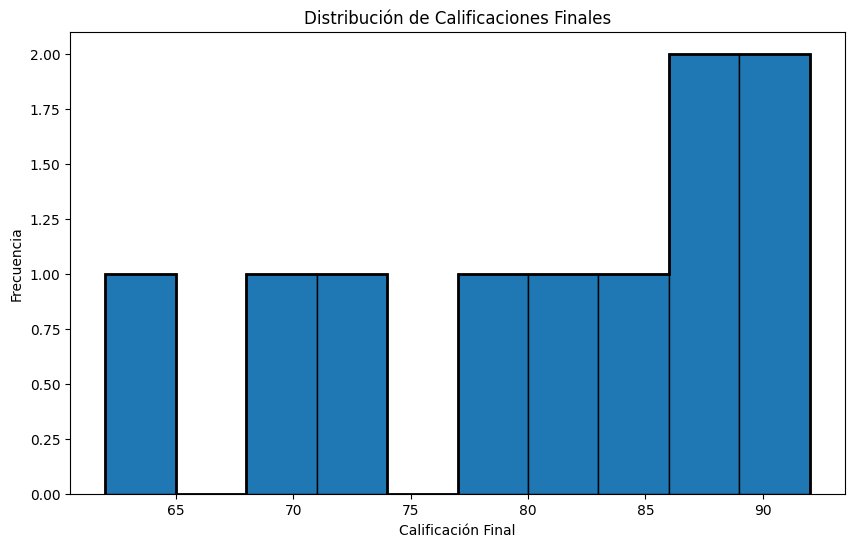

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['FinalGrade'], bins=10, edgecolor='black')
plt.hist(dataset['FinalGrade'], bins=10, edgecolor='black', histtype='step', linewidth=2)
plt.title('Distribución de Calificaciones Finales')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.show()


### Gráfico de dispersión entre horas de estudio y calificación final

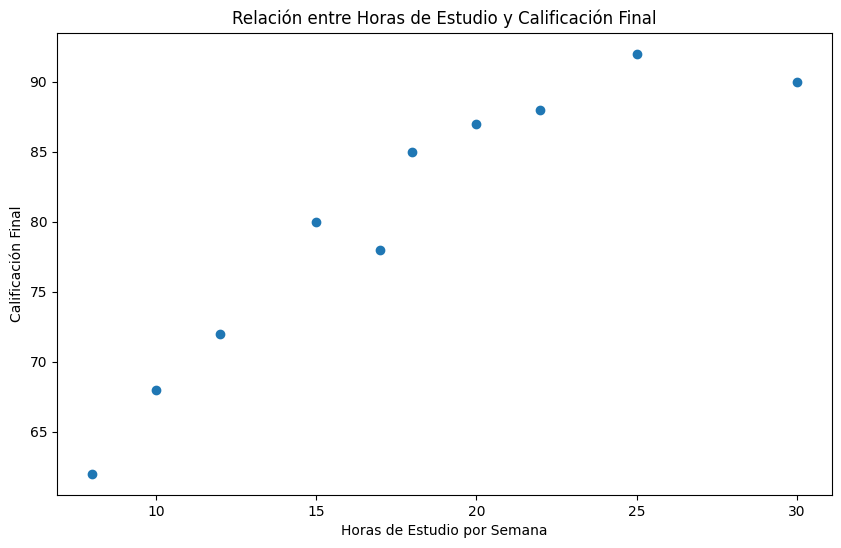

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['StudyHoursPerWeek'], dataset['FinalGrade'])
plt.title('Relación entre Horas de Estudio y Calificación Final')
plt.xlabel('Horas de Estudio por Semana')
plt.ylabel('Calificación Final')
plt.show()

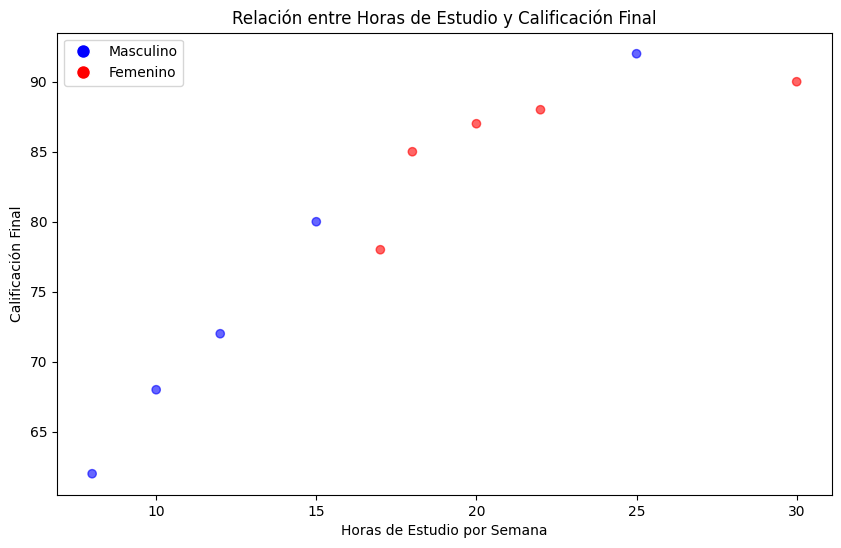

In [23]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(dataset['StudyHoursPerWeek'], dataset['FinalGrade'],
                      c=dataset['Gender'].map({'Male': 'blue', 'Female': 'red'}),
                      alpha=0.6)

plt.title('Relación entre Horas de Estudio y Calificación Final')
plt.xlabel('Horas de Estudio por Semana')
plt.ylabel('Calificación Final')

# Añadir una leyenda
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Masculino',
                              markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Femenino',
                              markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()

### Gráfico de barras de calificación promedio por género

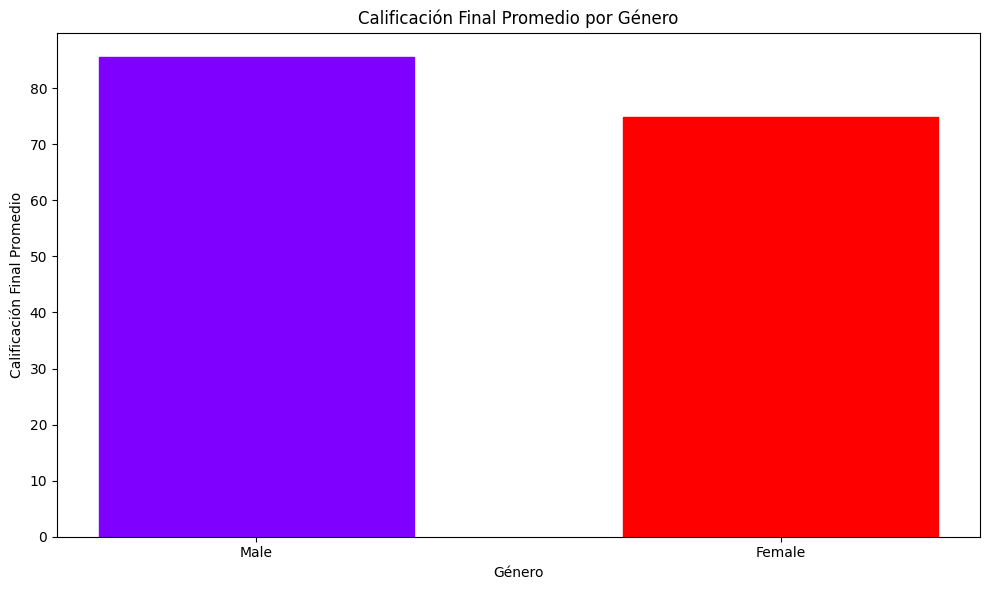

In [15]:
plt.figure(figsize=(10, 6))

# Datos
categorias = dataset['Gender'].unique()
promedios = dataset.groupby('Gender')['FinalGrade'].mean()

# Crear barras con colores diferentes
bars = plt.bar(categorias, promedios, width=0.6)

# Asignar un color diferente a cada barra
colors = plt.cm.rainbow(np.linspace(0, 1, len(categorias)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title('Calificación Final Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Calificación Final Promedio')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# GRAFICOS AVANZADOS

### Gráfico de violín para calificaciones finales por género

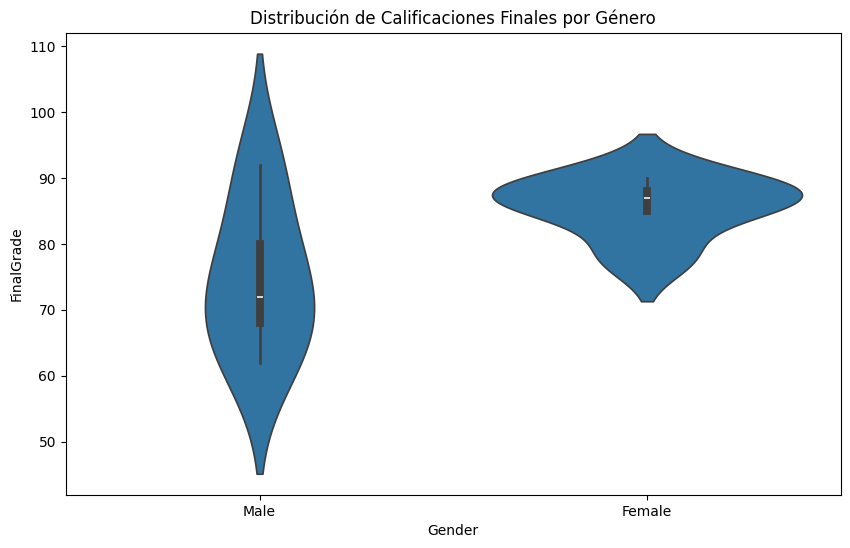

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='FinalGrade', data=dataset)
plt.title('Distribución de Calificaciones Finales por Género')
plt.show()

###Mapa de calor: Correlación entre variables numéricas

In [ ]:
plt.figure(figsize=(12, 10))
numeric_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'FinalGrade']
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor: Correlación entre Variables')
plt.show()

### Pairplot para variables numéricas

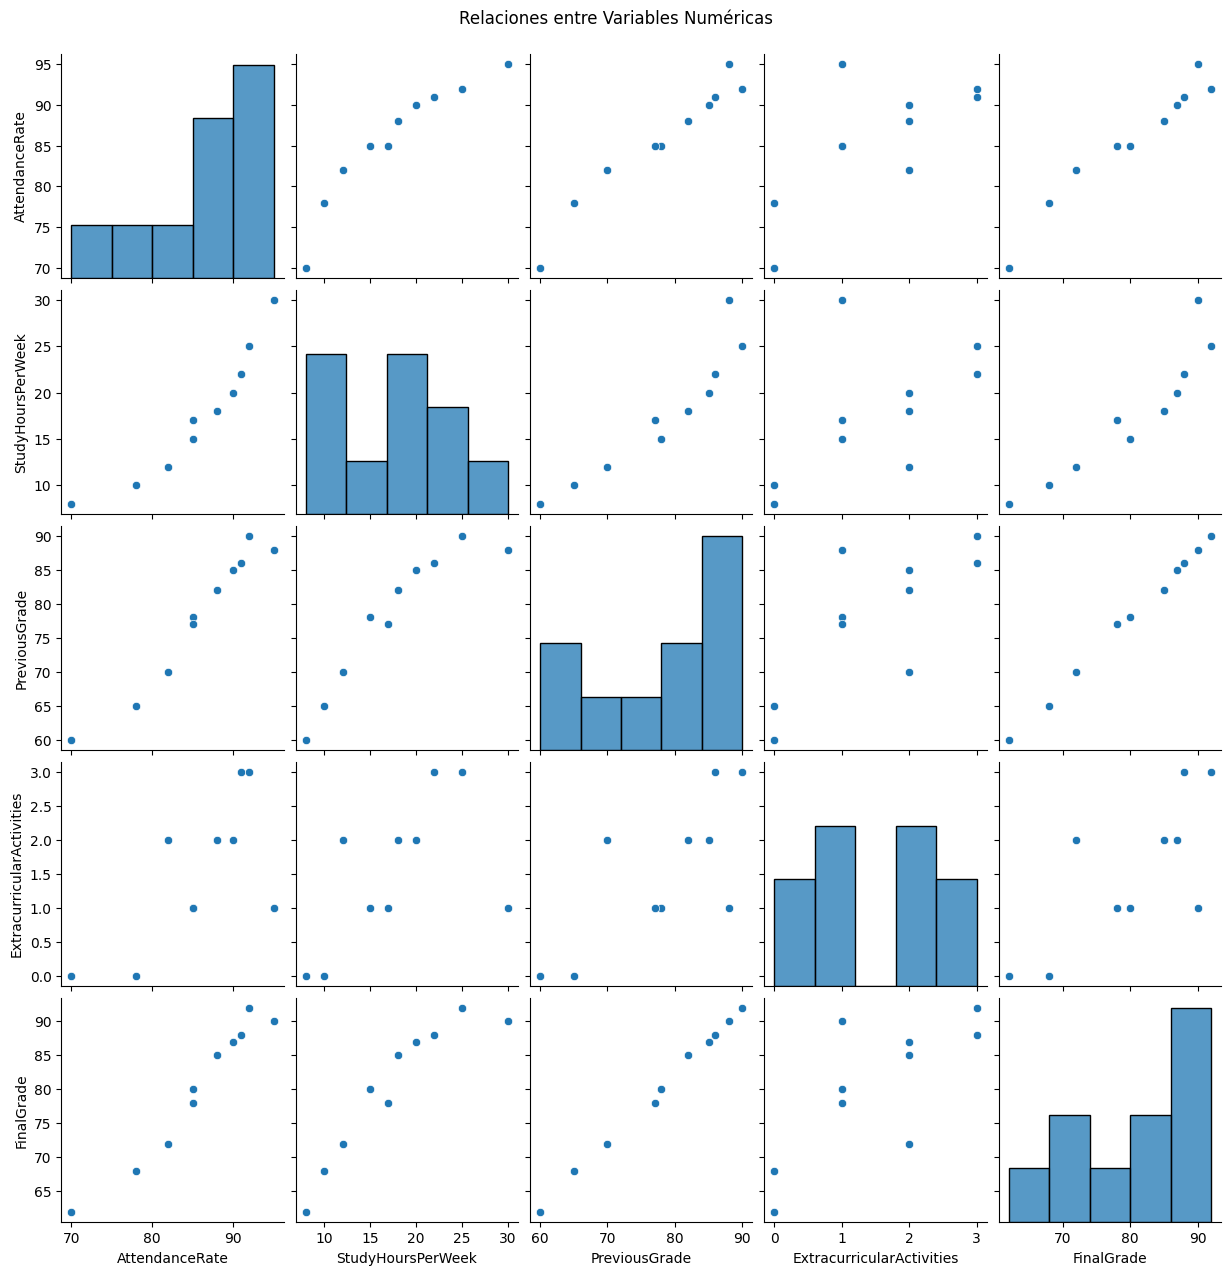

In [17]:
sns.pairplot(dataset[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'FinalGrade']])
plt.suptitle('Relaciones entre Variables Numéricas', y=1.02)
plt.show()



# GRAFICOS INTERACTIVOS (usando Plotly):

In [18]:
import plotly.express as px
import plotly.graph_objects as go

### Gráfico de dispersión interactivo

In [19]:
fig = px.scatter(dataset, x='StudyHoursPerWeek', y='FinalGrade', color='Gender',
                 hover_data=['Name', 'AttendanceRate', 'PreviousGrade'],
                 title='Relación entre Horas de Estudio y Calificación Final')
fig.show()

### Histograma interactivo

In [20]:
fig = px.histogram(dataset, x='FinalGrade', color='Gender', marginal='box',
                   title='Distribución de Calificaciones Finales por Género')
fig.show()

### Gráfico de barras interactivo

In [21]:
fig = px.bar(dataset.groupby('ParentalSupport')['FinalGrade'].mean().reset_index(),
             x='ParentalSupport', y='FinalGrade',
             title='Calificación Final Promedio por Nivel de Apoyo Parental')
fig.show()

# OTROS GRAFICOS

### Gráfico de caja: Calificación final por nivel de apoyo parental

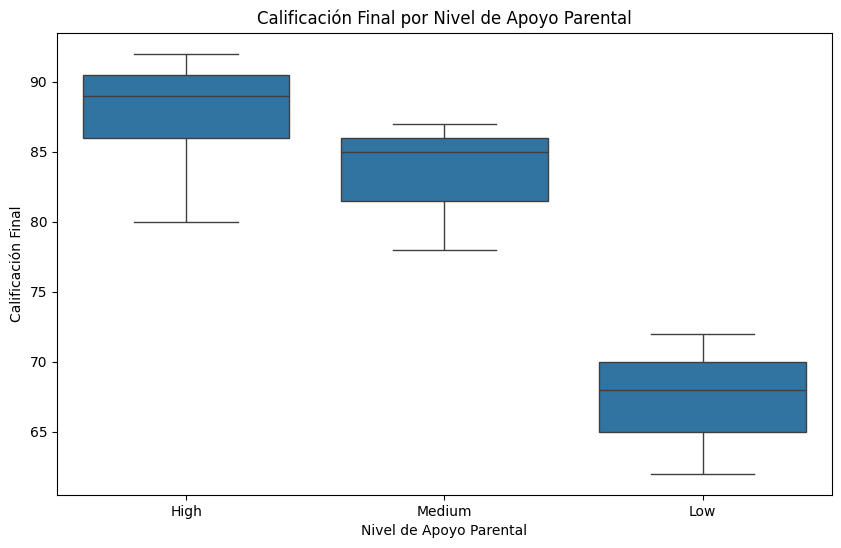

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalSupport', y='FinalGrade', data=dataset)
plt.title('Calificación Final por Nivel de Apoyo Parental')
plt.xlabel('Nivel de Apoyo Parental')
plt.ylabel('Calificación Final')
plt.show()
